# **Breast Cancer detection using Neural Networks**

Importing dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/kqbzrhfkpbwczjmxgcrmsu2k2afcwa') #data downloaded directly from data.world

# **Exploratory Data Analysis**

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#dropping useless columns
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#checking the unique values for the target variable
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
columns = df.columns

In [ ]:
from matplotlib import cycler
colors = cycler('color',
['#EE6666', '#3388BB', '#9988DD',
'#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


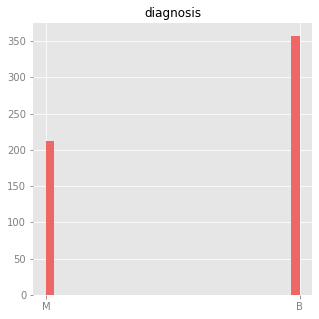

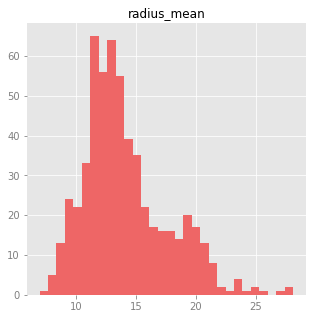

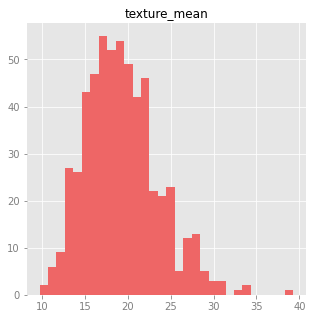

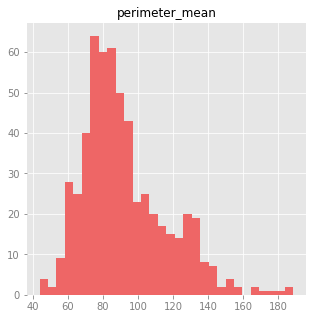

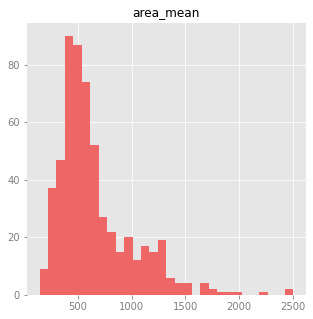

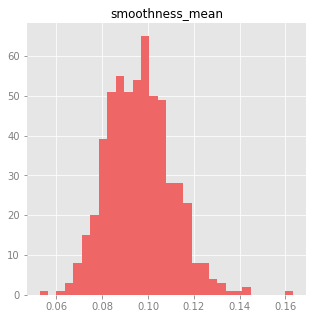

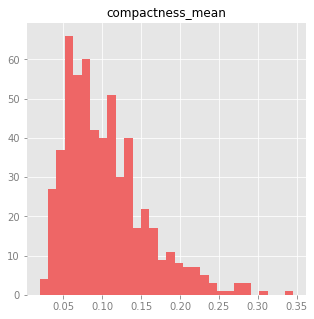

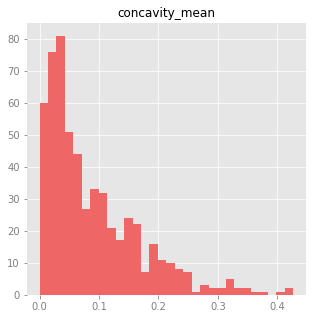

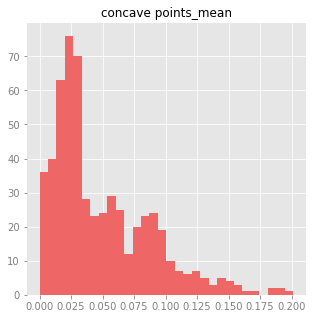

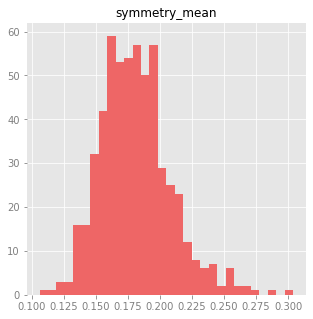

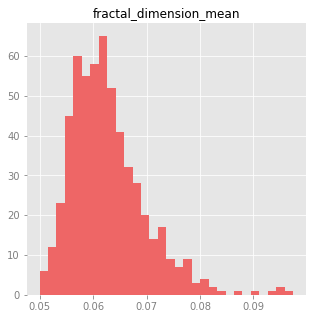

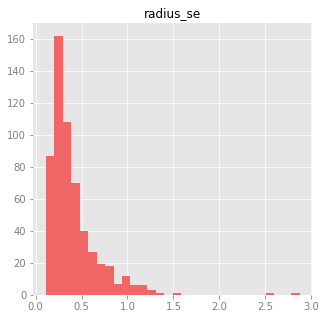

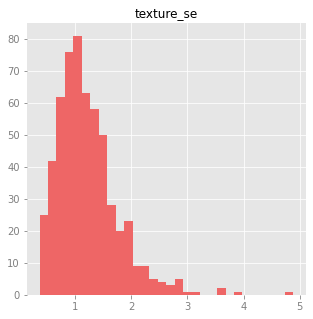

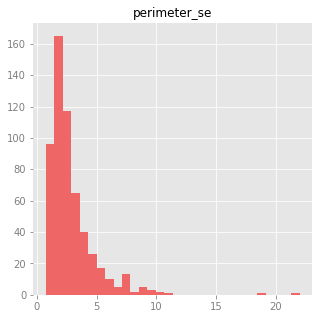

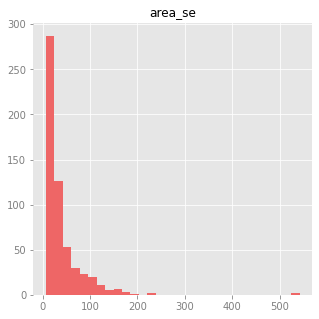

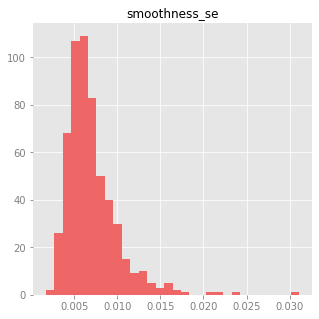

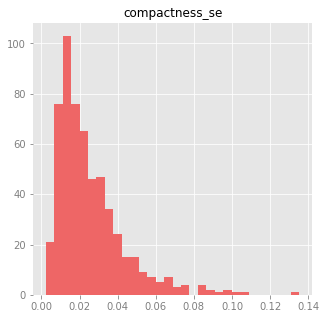

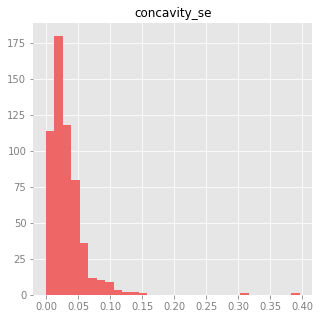

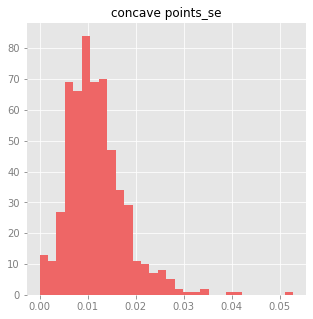

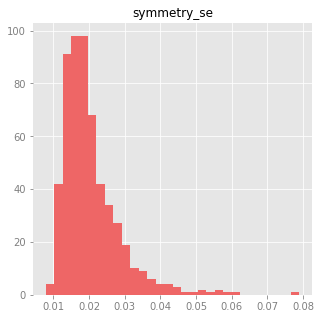

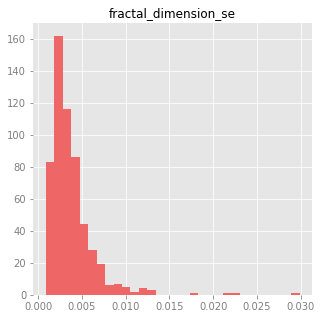

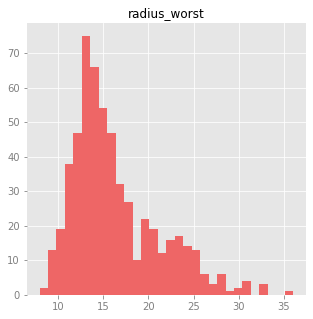

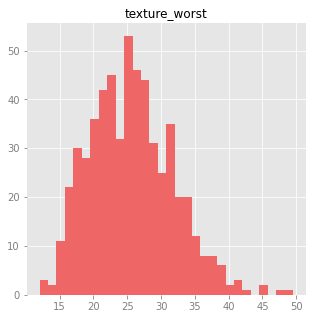

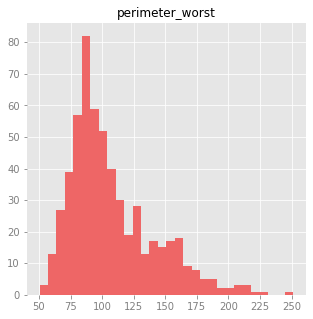

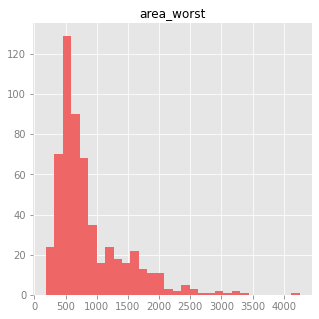

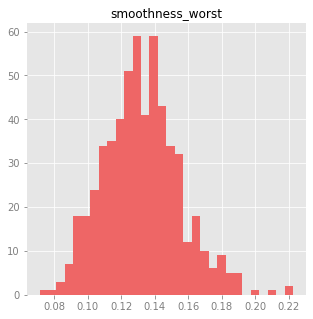

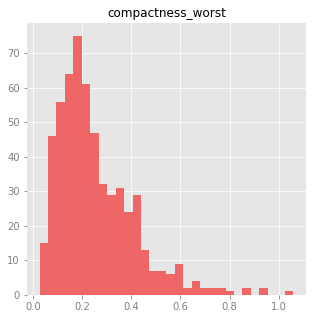

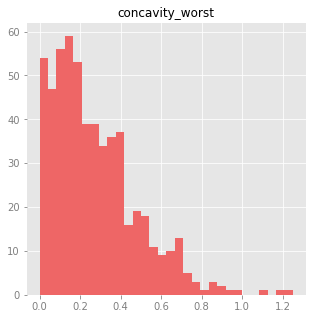

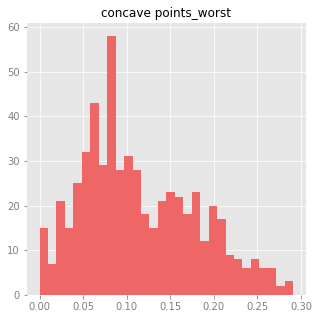

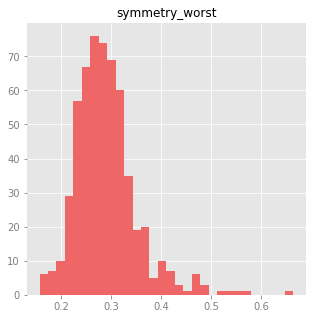

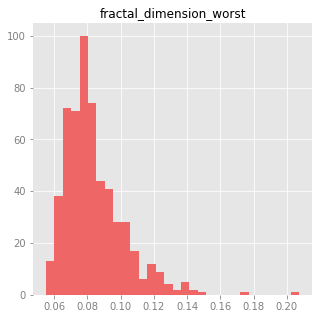

In [ ]:
#plotting column to check their distribution and skewness
j = 0
for i in columns:
  j = j+1
  plt.figure(figsize = (5,5))
  plt.title(i)
  plt.hist(df[i],30)

Most of the features right skewed , except symmetry mean, smoothness_mean and smoothness_worst

Checking correlation of each variable against each other

In [ ]:
corr_matrix = df.corr()

In [ ]:
import seaborn as sns

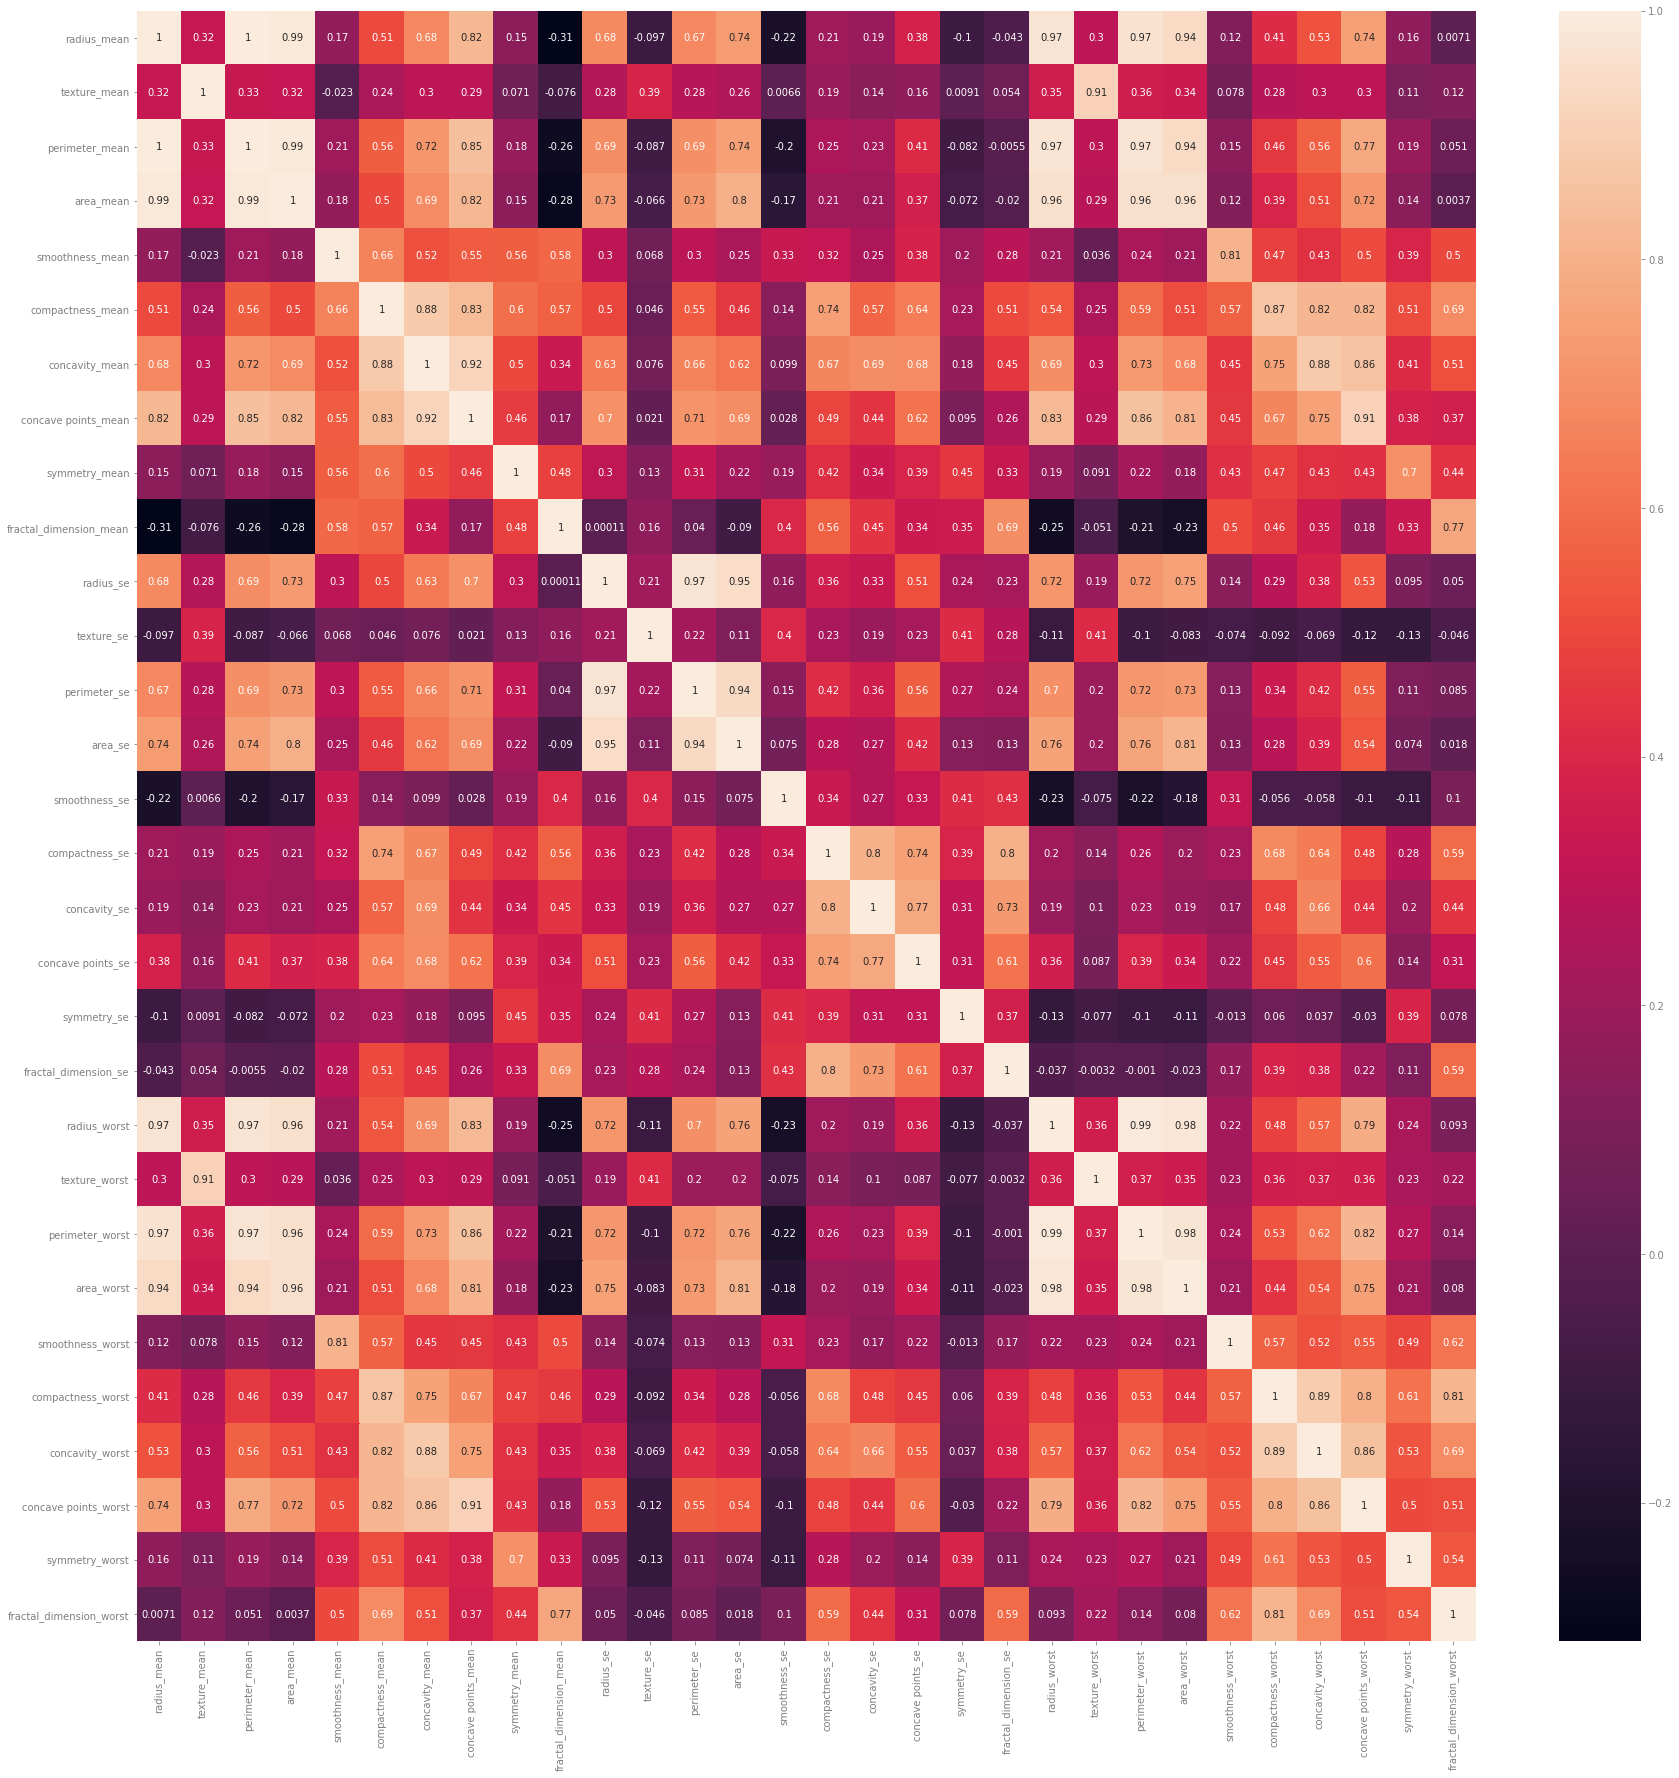

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#seperating the columns into individual groups to check their correlation with each other

mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

data_mean = df[mean]


se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',]
data_se = df[se]


worst = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']
data_worst = df[worst]

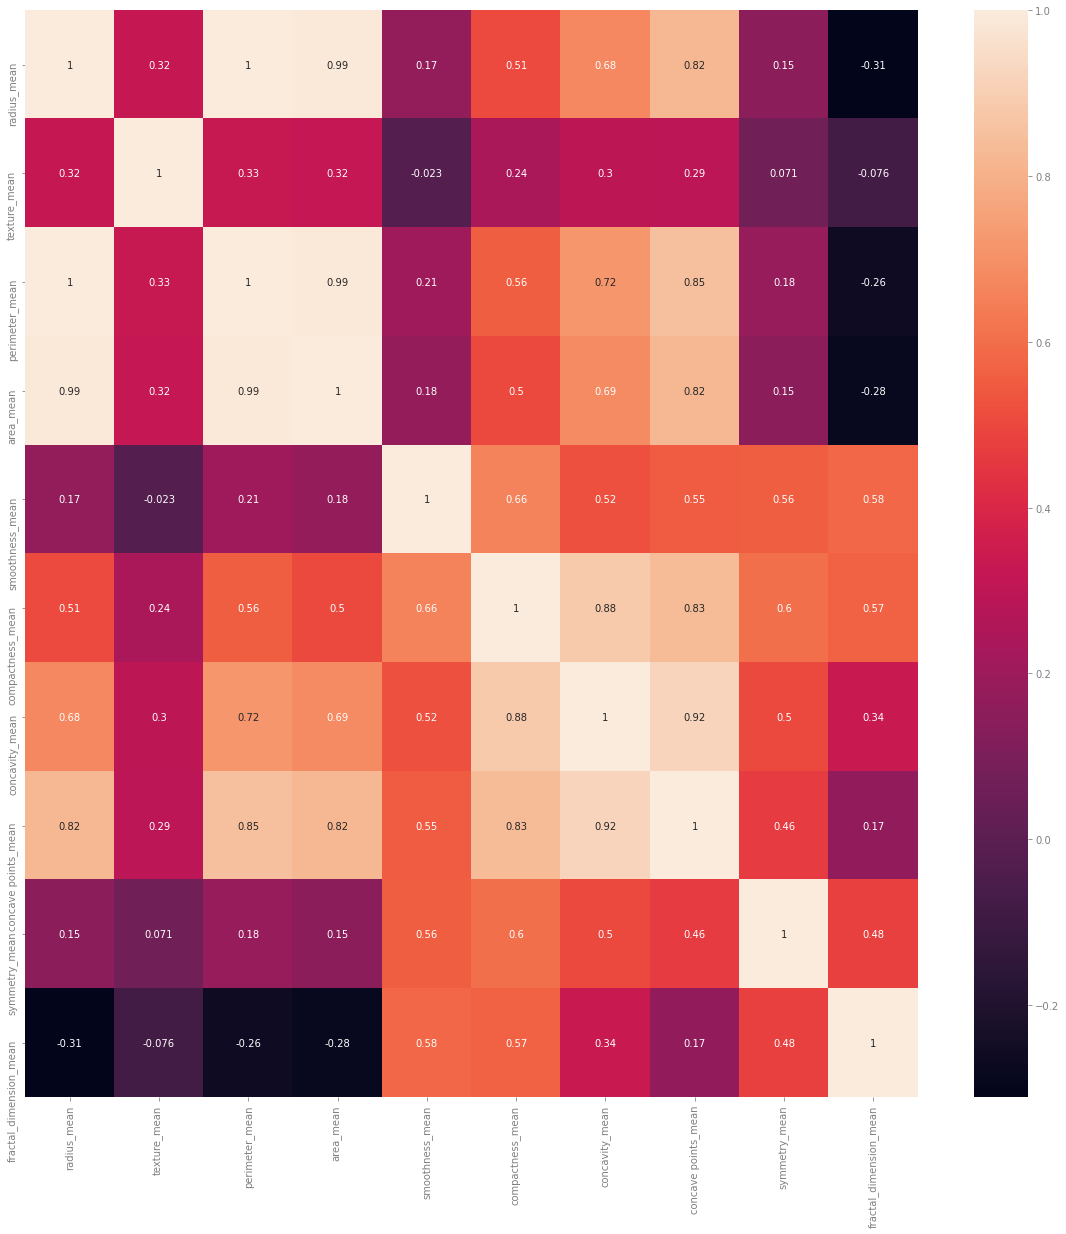

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_mean.corr(),annot=True)

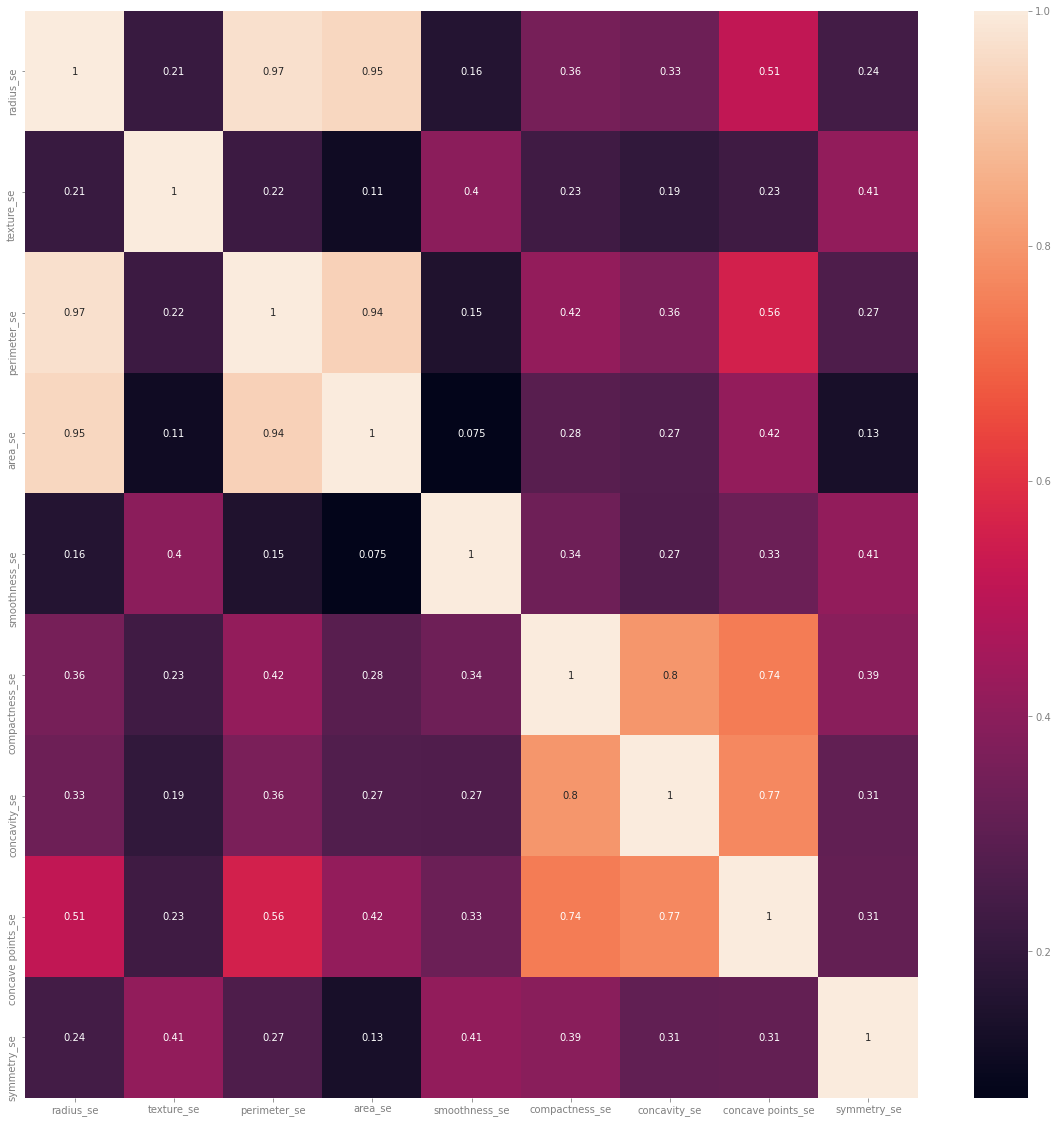

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_se.corr(),annot=True)

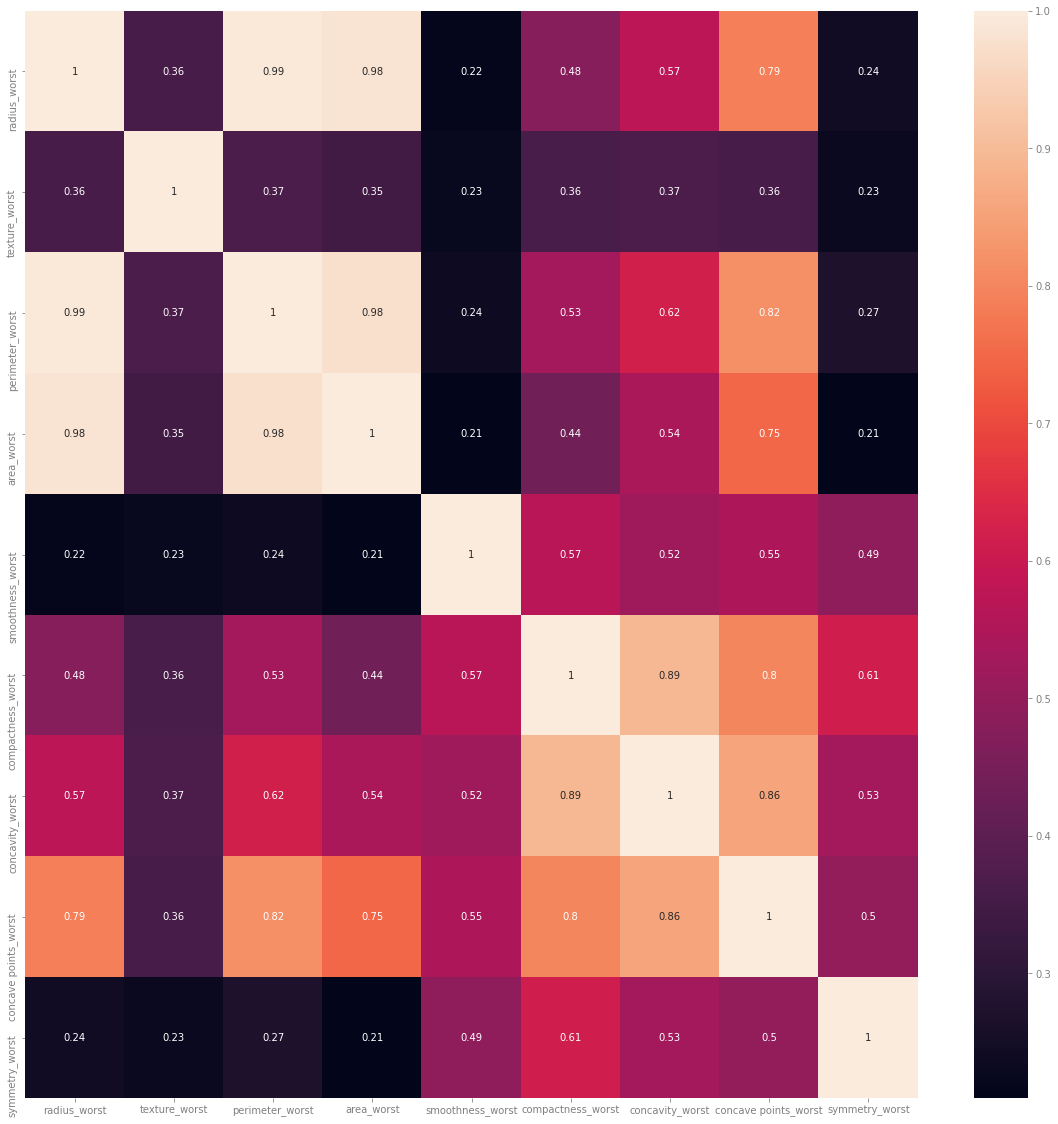

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_worst.corr(),annot=True)

High Positive Correlation between 
1. radius_mean and perimeter_mean
2. radius_mean and area_mean
3.radius_mean and concave_points_mean
4.perimeter_mean and area_mean
5.perimeter_mean and concave_points_mean
6.area_mean and concave_points_mean
7.compactness_mean and concavity_mean
8.compactness_mean and concave points_mean
9.concavity_mean and concave points_mean



High Positive Correlation between 
1. radius_se and perimeter_se
2. radius_se and area_se
3.radius_se and concave_points_se
4.perimeter_se and area_se
5.compactness_se and concavity_se


High Positive Correlation between 
1. radius_worst and perimeter_worst
2. radius_worst and area_worst
3.radius_worst and concave_points_worst
4.perimeter_worst and area_worst
5.perimeter_worst and concave_points_worst
6.area_worst and concave_points_worst
7.compactness_worst and concavity_worst
8.compactness_worst and concavity_points_worst
9.concavity_worst and concavity_points_worst

# **Preparing data for further predictions**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df,test = train_test_split(df,test_size = 0.2)

df,validation = train_test_split(df,test_size = 0.2)

In [ ]:
df.shape

(364, 31)

In [ ]:
test.shape

(114, 31)

In [ ]:
validation.shape

(91, 31)

In [ ]:
labels = df['diagnosis']

df.drop(columns = ['diagnosis'],inplace = True)

In [ ]:
daig = validation['diagnosis']

validation.drop(columns = ['diagnosis'],inplace=True)

In [ ]:
validation.shape

(91, 30)

In [ ]:
data_x = df

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
n = Normalizer()

data_x = n.fit_transform(data_x)

In [ ]:
import tensorflow as tf

In [ ]:
map = {'M':1,'B':0}

labels = labels.map(map
           )

In [ ]:
validation = n.transform(validation)

daig = daig.map(map)

In [ ]:
test_y = test['diagnosis']

In [ ]:
test = test.drop(columns = ['diagnosis'])

In [ ]:
test = n.transform(test)

In [ ]:
test_y = test_y.map(map)

Building the final model

In [ ]:
epoch = 100
model = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(12,input_dim =30,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(5,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(5,activation = 'relu'),
                                  tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    
                                    

])
model_check = tf.keras.callbacks.ModelCheckpoint('model_check.h5',save_best_only=True)
model.compile(loss = ['binary_crossentropy'],optimizer ='adam',metrics = ['accuracy'])
history = model.fit(data_x,labels,epochs=epoch,verbose=0,validation_data = (validation,daig),callbacks = [model_check])

Text(0.5, 1.0, 'Training and Validation Loss')

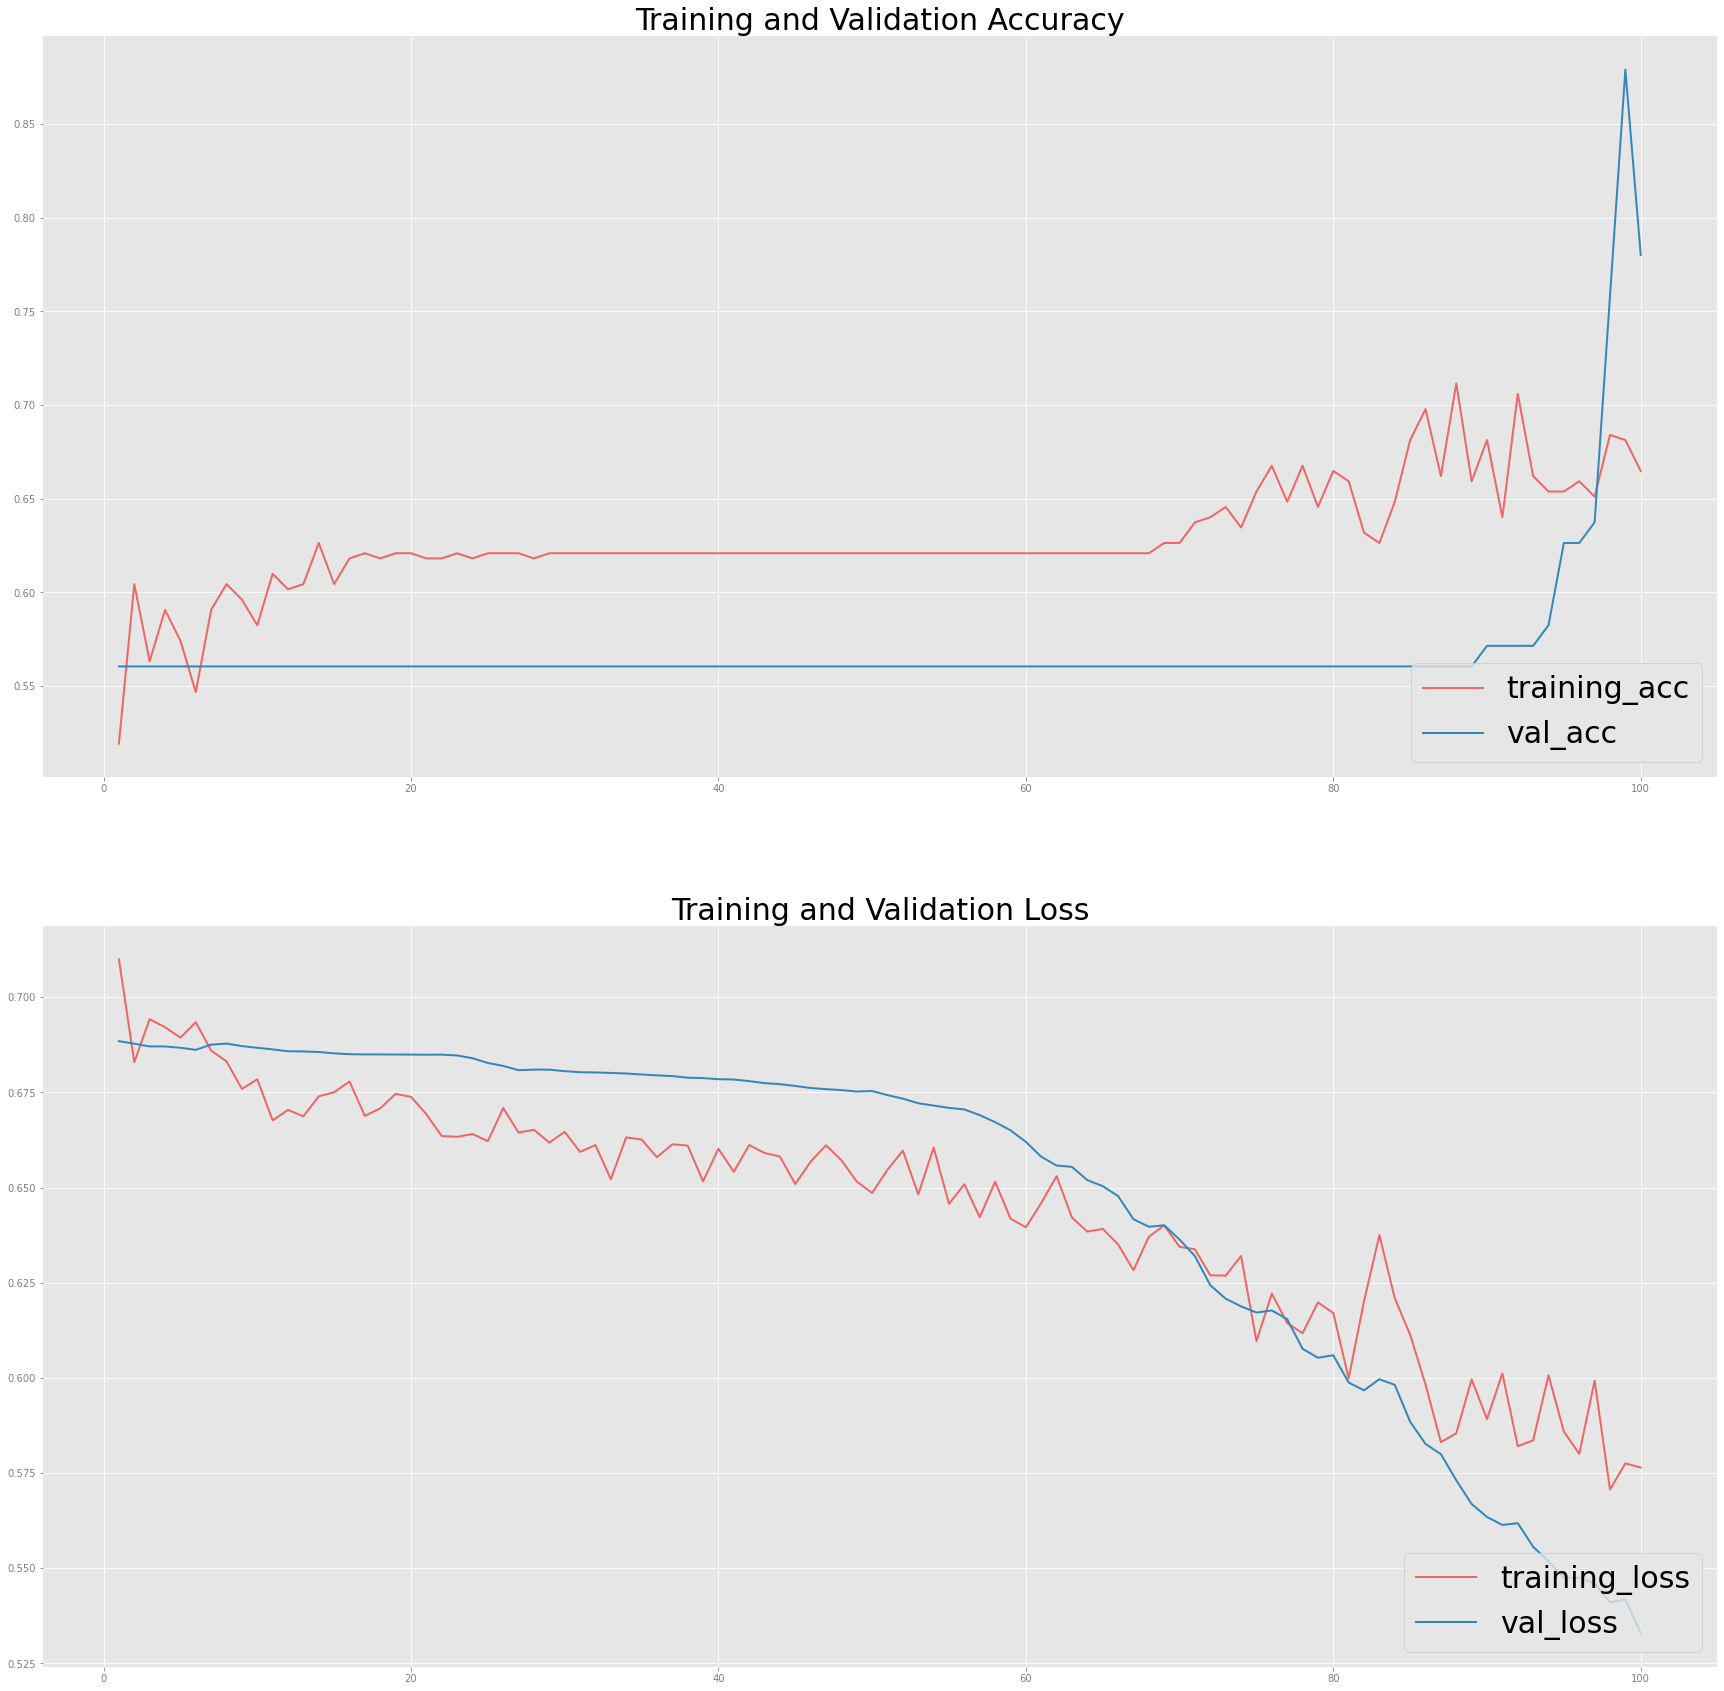

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1,epoch+1)

plt.figure(figsize = (30,30))
plt.subplot(2,1,1)
plt.plot(epochs_range,acc,label = 'training_acc')
plt.plot(epochs_range,val_acc,label = 'val_acc')
plt.legend(loc = 'lower right',fontsize = 30)
plt.title('Training and Validation Accuracy',fontsize = 30)
plt.subplot(2,1,2)
plt.plot(epochs_range,loss,label = 'training_loss')
plt.plot(epochs_range,val_loss,label = 'val_loss')
plt.legend(loc = 'lower right',fontsize = 30)
plt.title('Training and Validation Loss',fontsize = 30)

In [ ]:
predictions = model.predict(test)

In [ ]:
pred = []
for i in range(0,len(predictions)):
  if predictions[i][0]>=0.5:
    pred.append(1)
  else:
    pred.append(0) 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,pred)

0.868421052631579